In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import colors
import matplotlib.ticker as ticker

import sys
sys.path.append('..')
sys.path.append('../../../code')
from lib import *
plt.style.use('../../../code/peptidome.mplstyle')
from lib.plotting import model_labels as labels
import pyrepseq.plotting as prsp
import seaborn as sns

import scipy.stats

datadir = '../../../code/maxent/data'
figdatadir = './'

k=9

In [2]:
uniform_matrix =  np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k))

In [3]:
malaria_independent_params = np.load(f'{datadir}/Malaria_independent_k9_params.npz')
virus_independent_params = np.load(f'{datadir}/Humanviruses_independent_k9_params.npz')

In [4]:
human_independent_params = np.load(f'{datadir}/Human_independent_k9_params.npz')
human_independent_params

NpzFile '../../../code/maxent/data/Human_independent_k9_params.npz' with keys: f

In [5]:
malaria_shuffled_array = malaria_independent_params['f'].copy()
malaria_shuffled_again = malaria_independent_params['f'].copy()
np.random.shuffle(malaria_shuffled_array)
np.random.shuffle(malaria_shuffled_again)

In [6]:
virus_shuffled_array = virus_independent_params['f'].copy()
virus_shuffled_again = virus_independent_params['f'].copy()
np.random.shuffle(virus_shuffled_array)
np.random.shuffle(virus_shuffled_again)

In [7]:
# malaria_alt = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=malaria_independent_params['f'])


In [9]:
malaria_shuffled_matrix = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=malaria_shuffled_array)
malaria_shuffled_matrix_2 = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=malaria_shuffled_again)

virus_shuffled_matrix = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=virus_shuffled_array)
virus_shuffled_matrix_2 = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=virus_shuffled_again)

In [10]:
reference = set(count_kmers_proteome(human, k, clean=True))

In [11]:
def mat_to_dist(A, size=100000):
    sample = matrix_to_kmers(A[np.random.choice(A.shape[0], size=size, replace=False), :])
    ns = nndist_hamming_distribution(sample, reference)
    return ns

In [12]:
models = [
'Humanviruses_independent',
'Humanviruses_ncov',
'Humanviruses_nskew',
'Humanviruses_nskewfcov',
'Humanviruses_train',
'Malaria_independent',
'Malaria_ncov',
'Malaria_nskew',
'Malaria_nskewfcov',
'Malaria_train',
'Malaria_test',
'Mouse_train'
]

In [13]:
ns_dict = {}
ps_dict = {}
for model in models:
    df = pd.read_csv(f'{datadir}/{model}_distance_to_self.csv',names=['0', '1', '2', '3+'])
    ns_dict[model] = np.array(df.loc['N'].values)
    ps_dict[model] = np.array(df.loc['P'].values)

In [14]:
ns_dict

{'Humanviruses_independent': array([np.float64(15.0), np.float64(1288.0), np.float64(43223.0),
        '55474.0'], dtype=object),
 'Humanviruses_ncov': array([np.float64(37.0), np.float64(2092.0), np.float64(46155.0),
        '51716.0'], dtype=object),
 'Humanviruses_nskew': array([np.float64(75.0), np.float64(2573.0), np.float64(46536.0),
        '50816.0'], dtype=object),
 'Humanviruses_nskewfcov': array([np.float64(76.0), np.float64(2593.0), np.float64(47232.0),
        '50099.0'], dtype=object),
 'Humanviruses_train': array([np.float64(154.0), np.float64(2838.0), np.float64(47800.0),
        '49208.0'], dtype=object),
 'Malaria_independent': array([np.float64(5.0), np.float64(808.0), np.float64(33737.0), '65450.0'],
       dtype=object),
 'Malaria_ncov': array([np.float64(15.0), np.float64(1183.0), np.float64(36401.0),
        '62401.0'], dtype=object),
 'Malaria_nskew': array([np.float64(76.0), np.float64(1567.0), np.float64(37096.0),
        '61261.0'], dtype=object),
 'Malaria_n

In [15]:
ns_dict['uniform'] = mat_to_dist(uniform_matrix)
ps_dict['uniform'] = ns_dict['uniform']/np.sum(ns_dict['uniform'])
ps_dict['uniform'][0] = len(reference)/20**k

In [ ]:
# ns_dict['malaria_alt'] = mat_to_dist(malaria_alt)
# ps_dict['malaria_alt'] = ns_dict['malaria_alt']/np.sum(ns_dict['malaria_alt'])

In [16]:
ns_dict['virus_shuffled_independent'] = mat_to_dist(virus_shuffled_matrix)
ps_dict['virus_shuffled_independent'] = ns_dict['virus_shuffled_independent']/np.sum(ns_dict['virus_shuffled_independent'])

ns_dict['virus_shuffled_independent2'] = mat_to_dist(virus_shuffled_matrix_2)
ps_dict['virus_shuffled_independent2'] = ns_dict['virus_shuffled_independent2']/np.sum(ns_dict['virus_shuffled_independent2'])

In [17]:
ns_dict['malaria_shuffled_independent'] = mat_to_dist(malaria_shuffled_matrix)
ps_dict['malaria_shuffled_independent'] = ns_dict['malaria_shuffled_independent']/np.sum(ns_dict['malaria_shuffled_independent'])

ns_dict['malaria_shuffled_independent2'] = mat_to_dist(malaria_shuffled_matrix_2)
ps_dict['malaria_shuffled_independent2'] = ns_dict['malaria_shuffled_independent2']/np.sum(ns_dict['malaria_shuffled_independent2'])

In [20]:
freq_df = pd.DataFrame(data=[
    human_independent_params['f'],
    malaria_independent_params['f'].copy(),
    virus_independent_params['f'].copy(),
    malaria_shuffled_array,
    virus_shuffled_array
    ],columns=list(aminoacids),index=['Human','Malaria','Virus','Malaria Shuffled', 'Virus Shuffled'])
freq_df

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
Human,0.070007,0.022634,0.047581,0.071195,0.036642,0.065987,0.026254,0.043760,0.057332,0.099802,0.019796,0.035951,0.063270,0.047685,0.056445,0.083281,0.053331,0.060251,0.012148,0.026649
Malaria,0.019618,0.017968,0.063957,0.070856,0.044345,0.028318,0.024240,0.093673,0.118140,0.077035,0.020677,0.141612,0.019698,0.027805,0.026556,0.064407,0.040829,0.037535,0.004909,0.057823
Virus,0.077774,0.023660,0.050071,0.054126,0.038742,0.062523,0.025116,0.051574,0.047460,0.095090,0.019752,0.041658,0.061661,0.034560,0.065769,0.075220,0.063620,0.066281,0.013112,0.032231
Malaria Shuffled,0.064407,0.044345,0.040829,0.026556,0.141612,0.063957,0.027805,0.037535,0.019618,0.020677,0.118140,0.028318,0.077035,0.093673,0.017968,0.019698,0.024240,0.004909,0.070856,0.057823
Virus Shuffled,0.025116,0.063620,0.019752,0.054126,0.077774,0.047460,0.023660,0.065769,0.041658,0.051574,0.050071,0.066281,0.013112,0.095090,0.038742,0.034560,0.062523,0.032231,0.061661,0.075220


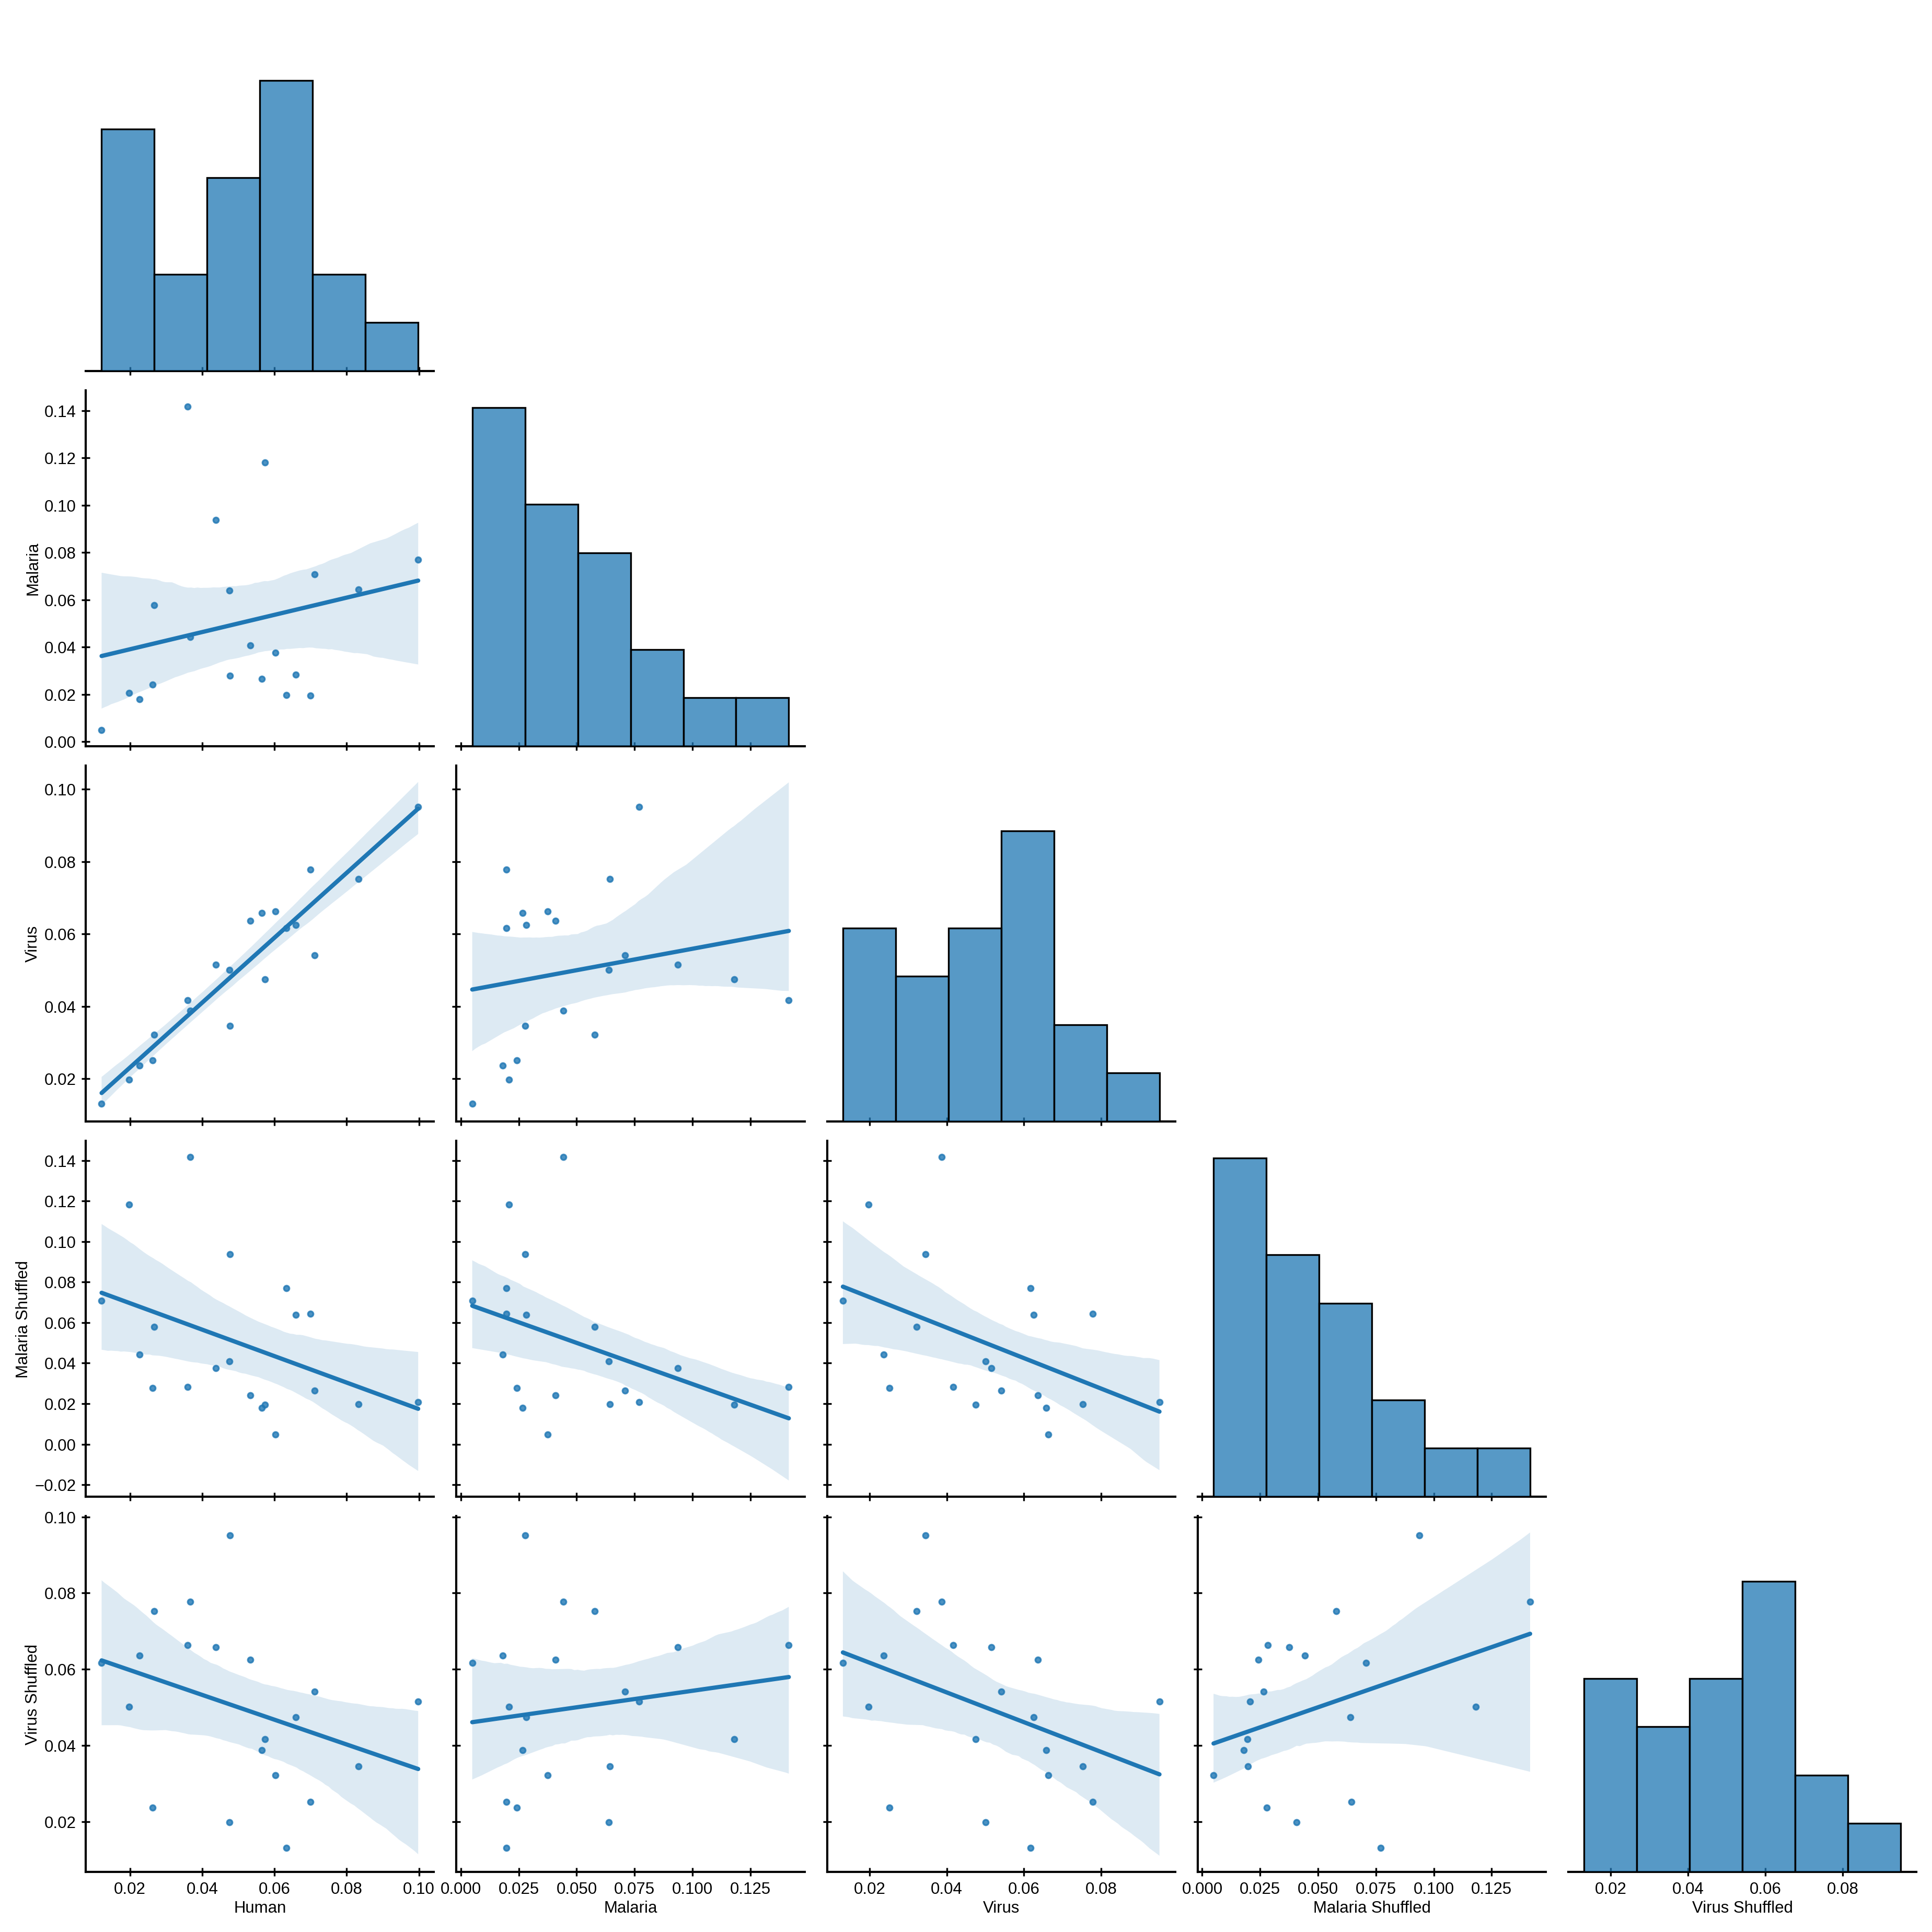

In [28]:
sns.pairplot(data=freq_df.T,corner=True,kind='reg') #plot_kws=dict(marker="o", s=25)

Text(0.5, 1.0, '$R^2 = 0.01$')

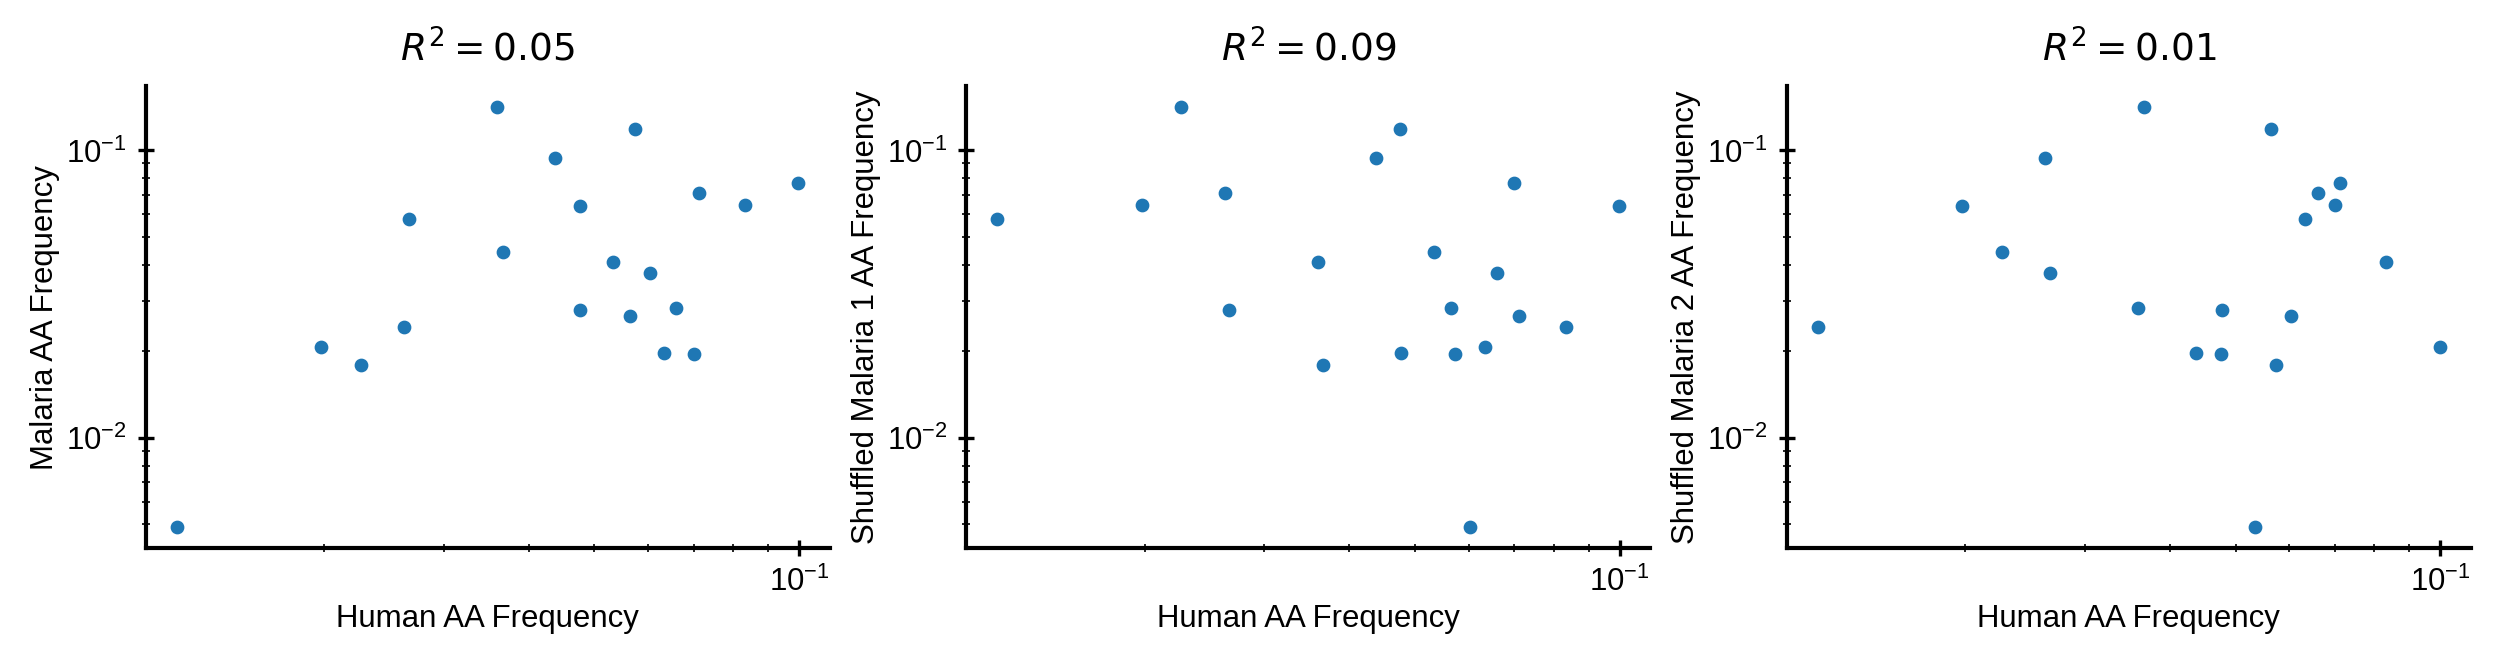

In [53]:
# fig, ax = plt.subplots(figsize=(10, 2), nrows=1, ncols=3)


# m, b, r_value, p_value, std_err = scipy.stats.linregress(human_independent_params['f'], malaria_independent_params['f'])
# ax[0].scatter(human_independent_params['f'],malaria_independent_params['f'])
# ax[0].set_ylabel('Malaria AA Frequency')
# ax[0].set_xlabel('Human AA Frequency')
# ax[0].set_xscale('log')
# ax[0].set_yscale('log')
# ax[0].set_title(f'$R^2 = {round(r_value**2,2)}$')

# m, b, r_value, p_value, std_err = scipy.stats.linregress(human_independent_params['f'],shuffled_array)

# ax[1].scatter(human_independent_params['f'],shuffled_array)
# ax[1].set_ylabel('Shuffled Malaria 1 AA Frequency')
# ax[1].set_xlabel('Human AA Frequency')
# ax[1].set_xscale('log')
# ax[1].set_yscale('log')
# ax[1].set_title(f'$R^2 = {round(r_value**2,2)}$')


# m, b, r_value, p_value, std_err = scipy.stats.linregress(human_independent_params['f'],shuffled_again)

# ax[2].scatter(human_independent_params['f'],shuffled_again)
# ax[2].set_ylabel('Shuffled Malaria 2 AA Frequency')
# ax[2].set_xlabel('Human AA Frequency')
# ax[2].set_xscale('log')
# ax[2].set_yscale('log')
# ax[2].set_title(f'$R^2 = {round(r_value**2,2)}$')


# # plt.scatter(malaria_independent_params['f'],shuffled_array)

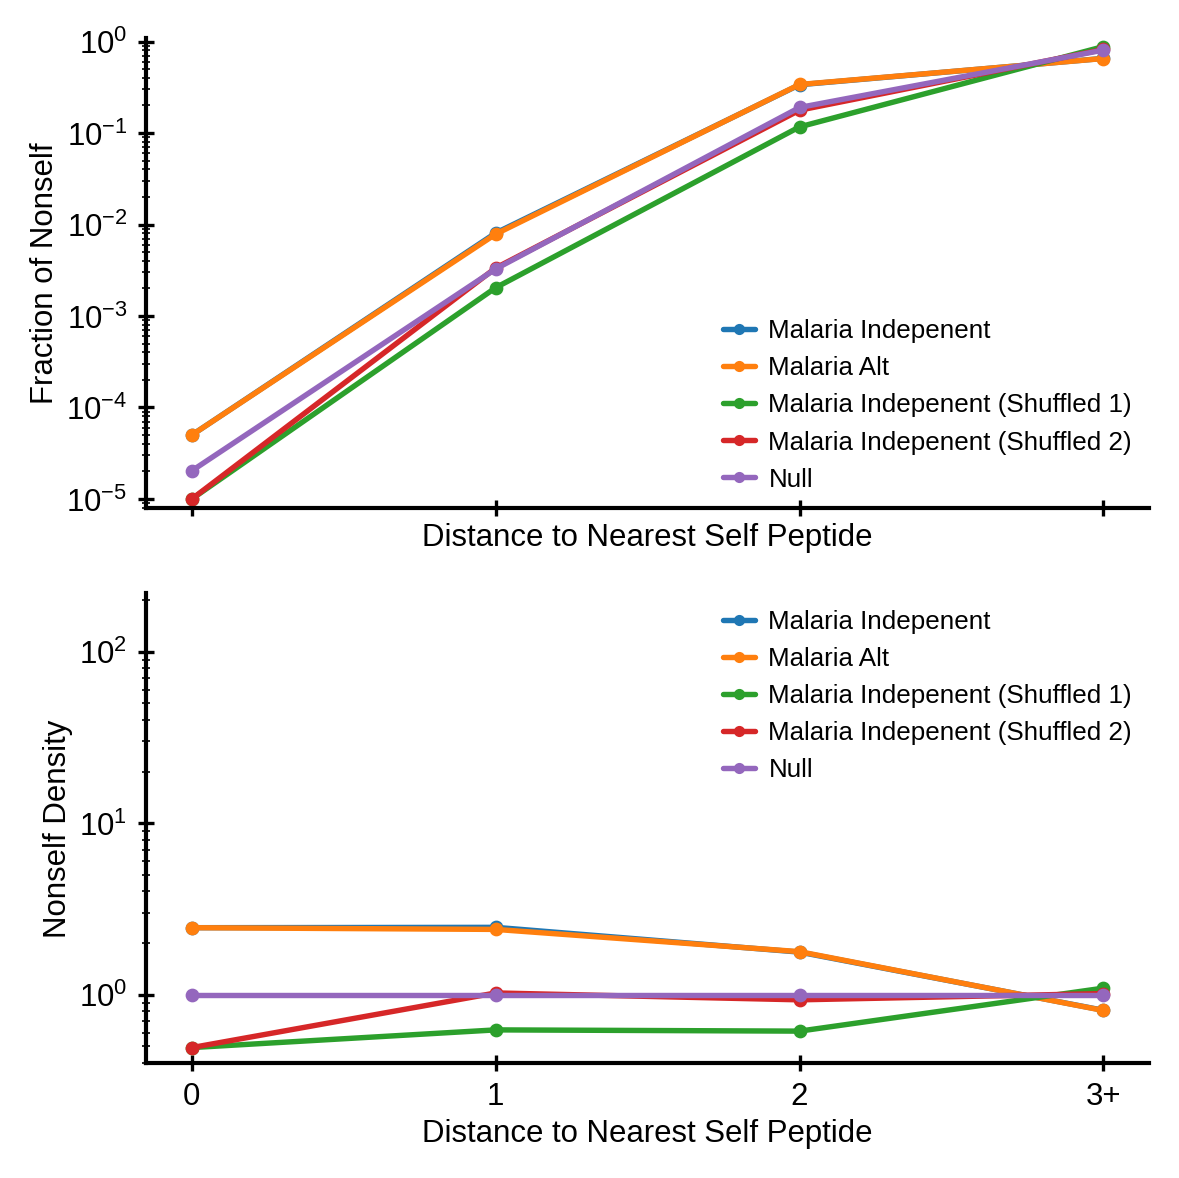

In [59]:
# fig, axes = plt.subplots(figsize=(4, 4), nrows=2, ncols=1, sharex=True)


# model_to_label = {
#     'Malaria_independent': 'Malaria Indepenent',
#     'malaria_alt': 'Malaria Alt',
#     'shuffled_independent': 'Malaria Indepenent (Shuffled 1)',
#     'shuffled_independent2': 'Malaria Indepenent (Shuffled 2)',
#     'uniform': 'Null'
# }
# for model in ['Malaria_independent','malaria_alt', 'shuffled_independent', 'shuffled_independent2', 'uniform']:
#     ps = ps_dict[model].astype(np.float64)
#     axes[0].plot(range(4), ps, '-o', label=model_to_label[model])
#     axes[1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
# #     axes[0,1].set_title('P. Falciparum')

# for ax in axes.reshape(-1):
#     ax.set_yscale('log')
#     ax.legend()
# # axes[0,0].set_yscale('log')
# # axes[1,0].set_yscale('log')
# # axes[0,1].set_yscale('log')
# # axes[1,1].set_yscale('log')

# axes[0].set_xticks([0, 1, 2, 3])
# axes[0].set_xticklabels([0, 1, 2, '3+'])
# axes[1].set_xticks([0, 1, 2, 3])
# axes[1].set_xticklabels([0, 1, 2, '3+'])

# axes[0].set_ylim(8e-6, 1.1)
# axes[0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
# axes[0].set_ylim(8e-6, 1.1)
# axes[1].set_yticks([1e0, 1e1, 1e2])
# axes[1].set_ylim(4e-1, 2.2e2)
# axes[0].set_ylabel('Fraction of Nonself')
# # axes[0,0].legend(loc='lower right')
# axes[1].set_ylabel('Nonself Density')
# # axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

# axes[0].set_xlabel('Distance to Nearest Self Peptide')
# axes[1].set_xlabel('Distance to Nearest Self Peptide')

# axes[0].legend()
# axes[1].legend()


# fig.tight_layout()

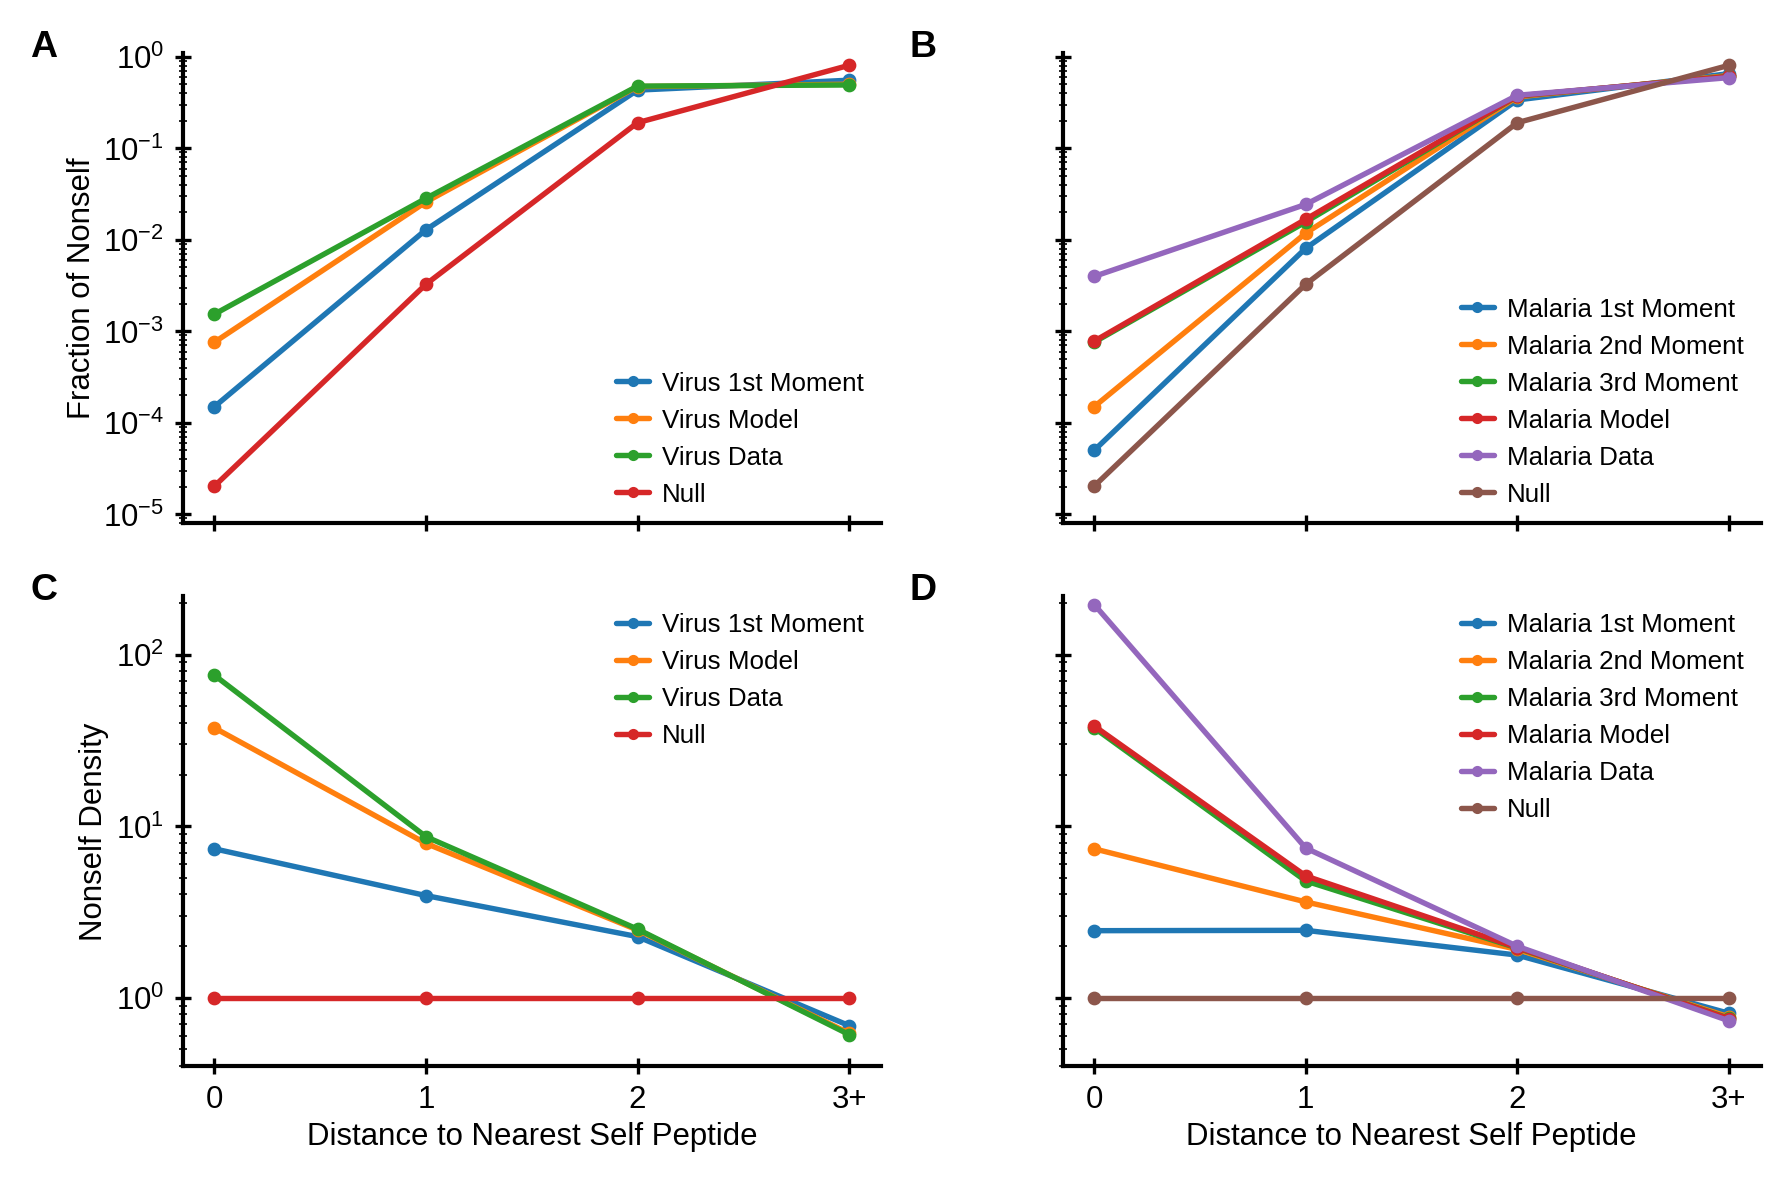

In [48]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_independent': 'Virus 1st Moment',
    'Humanviruses_nskewfcov': 'Virus Model',
    'Humanviruses_train': 'Virus Data',
    'Malaria_independent': 'Malaria 1st Moment',
    'Malaria_ncov': 'Malaria 2nd Moment',
    'Malaria_nskew': 'Malaria 3rd Moment',
    'Malaria_nskewfcov': 'Malaria Model',
    'Malaria_train': 'Malaria Data',
    'Malaria_test': 'Malaria Train Data',
    'Mouse_train': 'Mouse Data',
    'uniform': 'Null'
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_independent', 'Humanviruses_nskewfcov', 'Humanviruses_train','uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_independent', 'Malaria_ncov', 'Malaria_nskew',
              'Malaria_nskewfcov', 'Malaria_train', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()

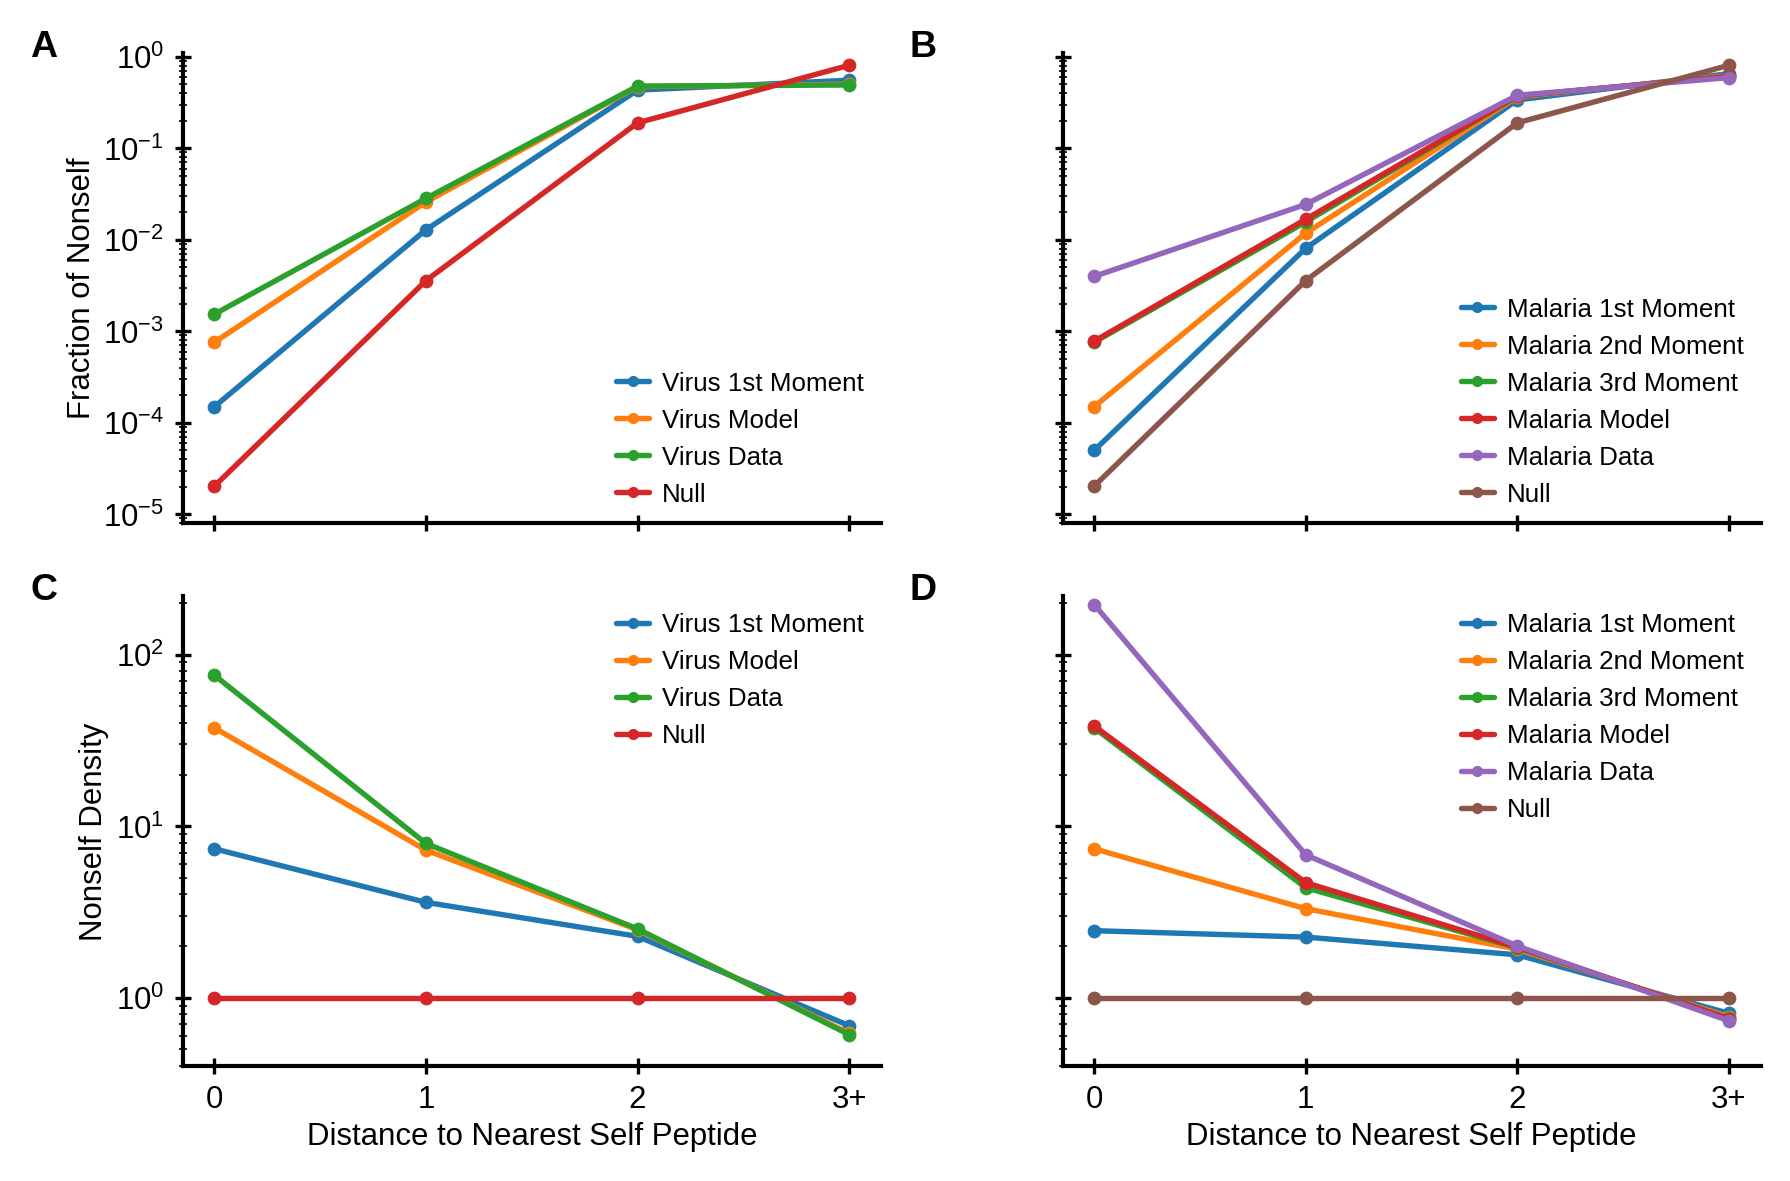

In [43]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_independent': 'Virus 1st Moment',
    'Humanviruses_nskewfcov': 'Virus Model',
    'Humanviruses_train': 'Virus Data',
    'Malaria_independent': 'Malaria 1st Moment',
    'Malaria_ncov': 'Malaria 2nd Moment',
    'Malaria_nskew': 'Malaria 3rd Moment',
    'Malaria_nskewfcov': 'Malaria Model',
    'Malaria_train': 'Malaria Data',
    'Malaria_test': 'Malaria Train Data',
    'Mouse_train': 'Mouse Data',
    'uniform': 'Null'
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_independent', 'Humanviruses_nskewfcov', 'Humanviruses_train','uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_independent', 'Malaria_ncov', 'Malaria_nskew',
              'Malaria_nskewfcov', 'Malaria_train', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3+')]

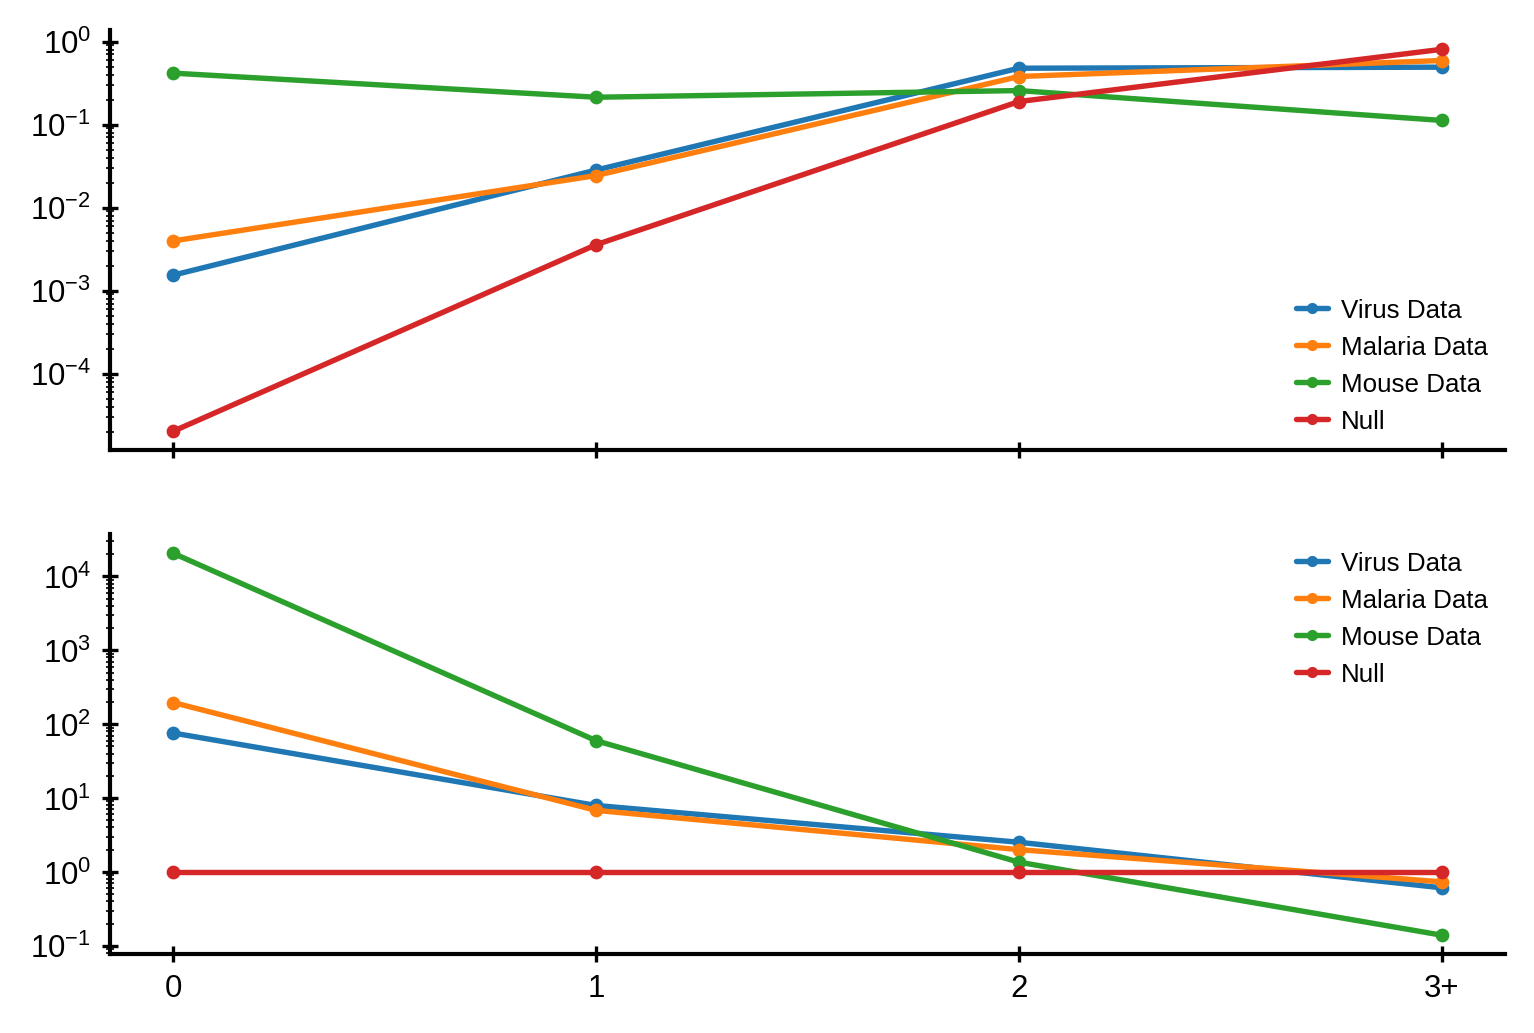

In [38]:
fig, ax = plt.subplots(figsize=(6, 4),nrows=2,ncols=1,sharex=True)
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_train','Malaria_train','Mouse_train','uniform']:
    ps = ps_dict[model].astype(np.float64)
    ax[0].plot(range(4), ps, '-o', label=model_to_label[model])
    ax[1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].legend()
ax[1].legend()
ax[1].set_xticks([0, 1, 2, 3])
ax[1].set_xticklabels([0, 1, 2, '3+'])



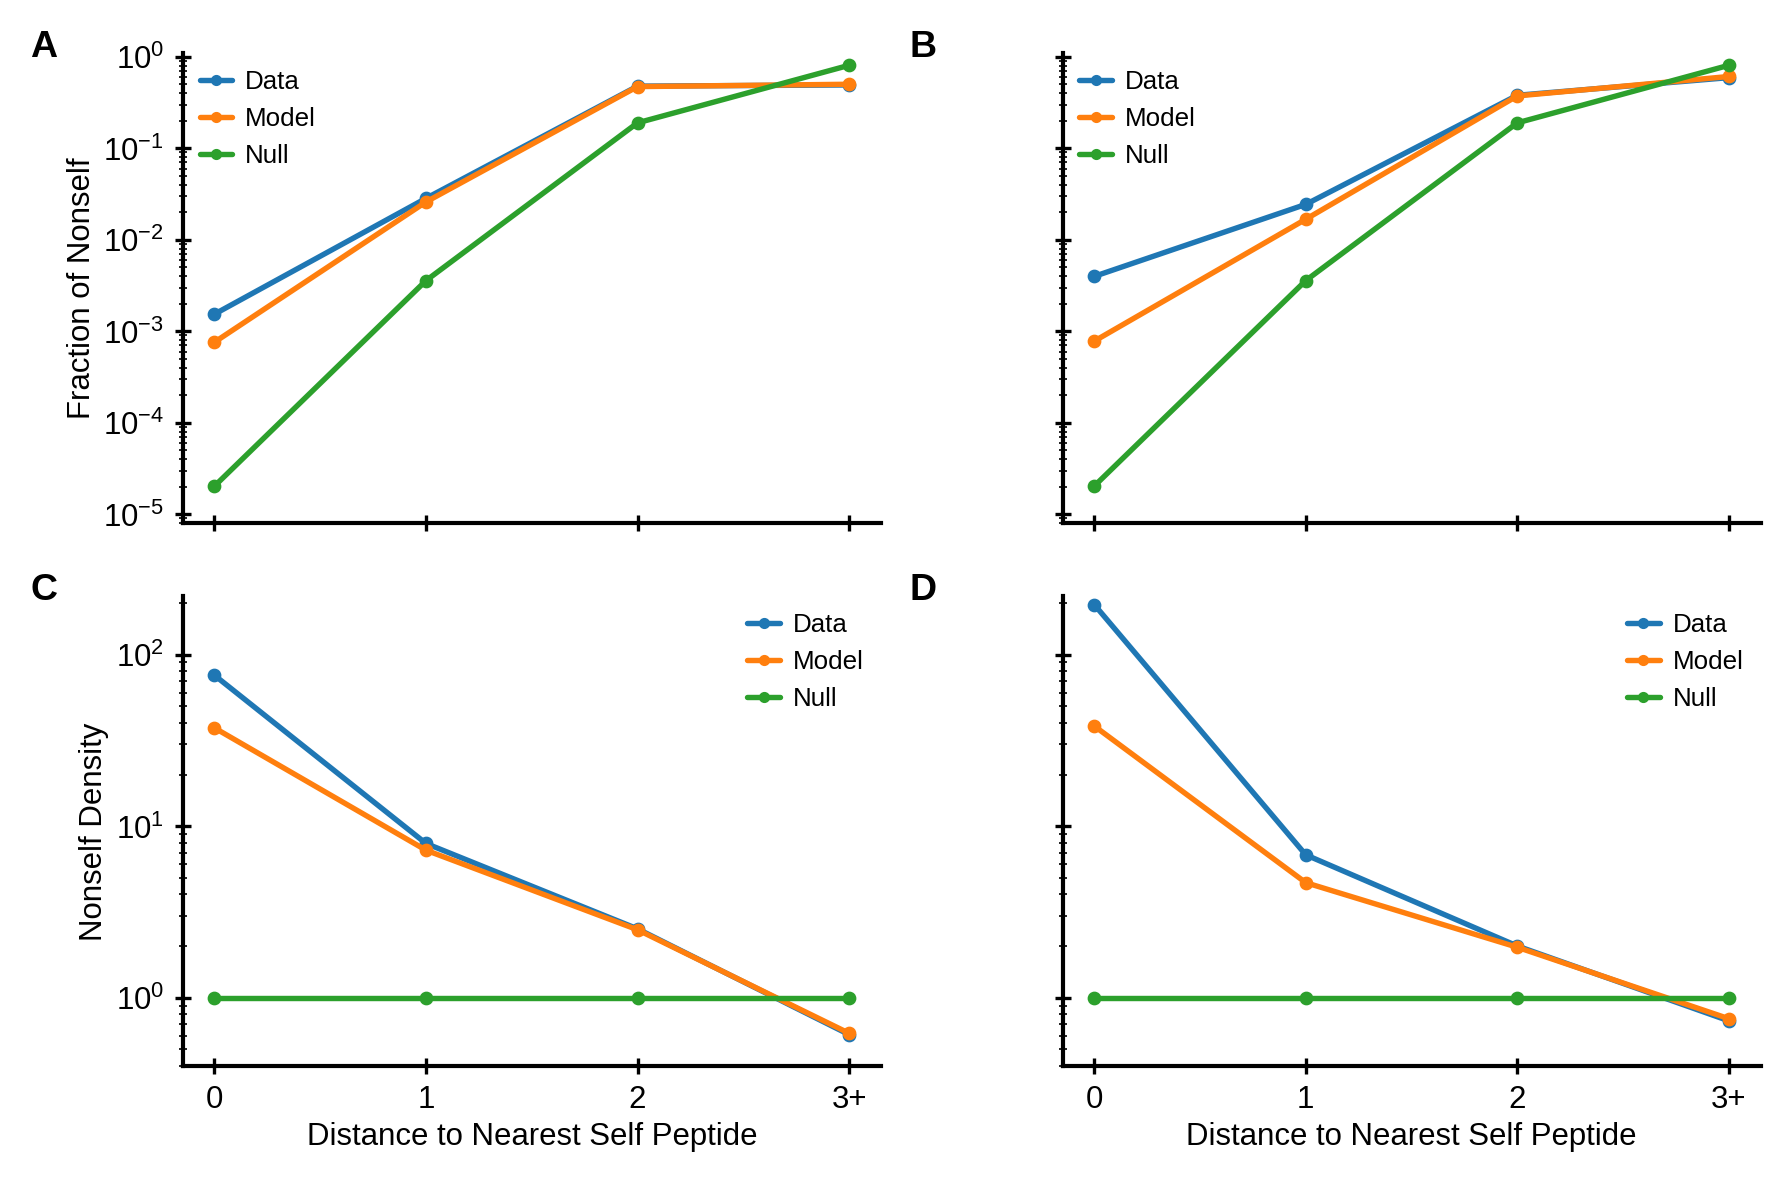

In [42]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_nskewfcov': 'Model',
    'Humanviruses_train': 'Data',
    'Malaria_nskewfcov': 'Model',
    'Malaria_train': 'Data',
    'uniform': 'Null'
    
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_train', 'Humanviruses_nskewfcov', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_train', 'Malaria_nskewfcov', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()
plt.savefig('../fig3_not_annotated.png')
plt.savefig('../fig3_not_annotated.svg')

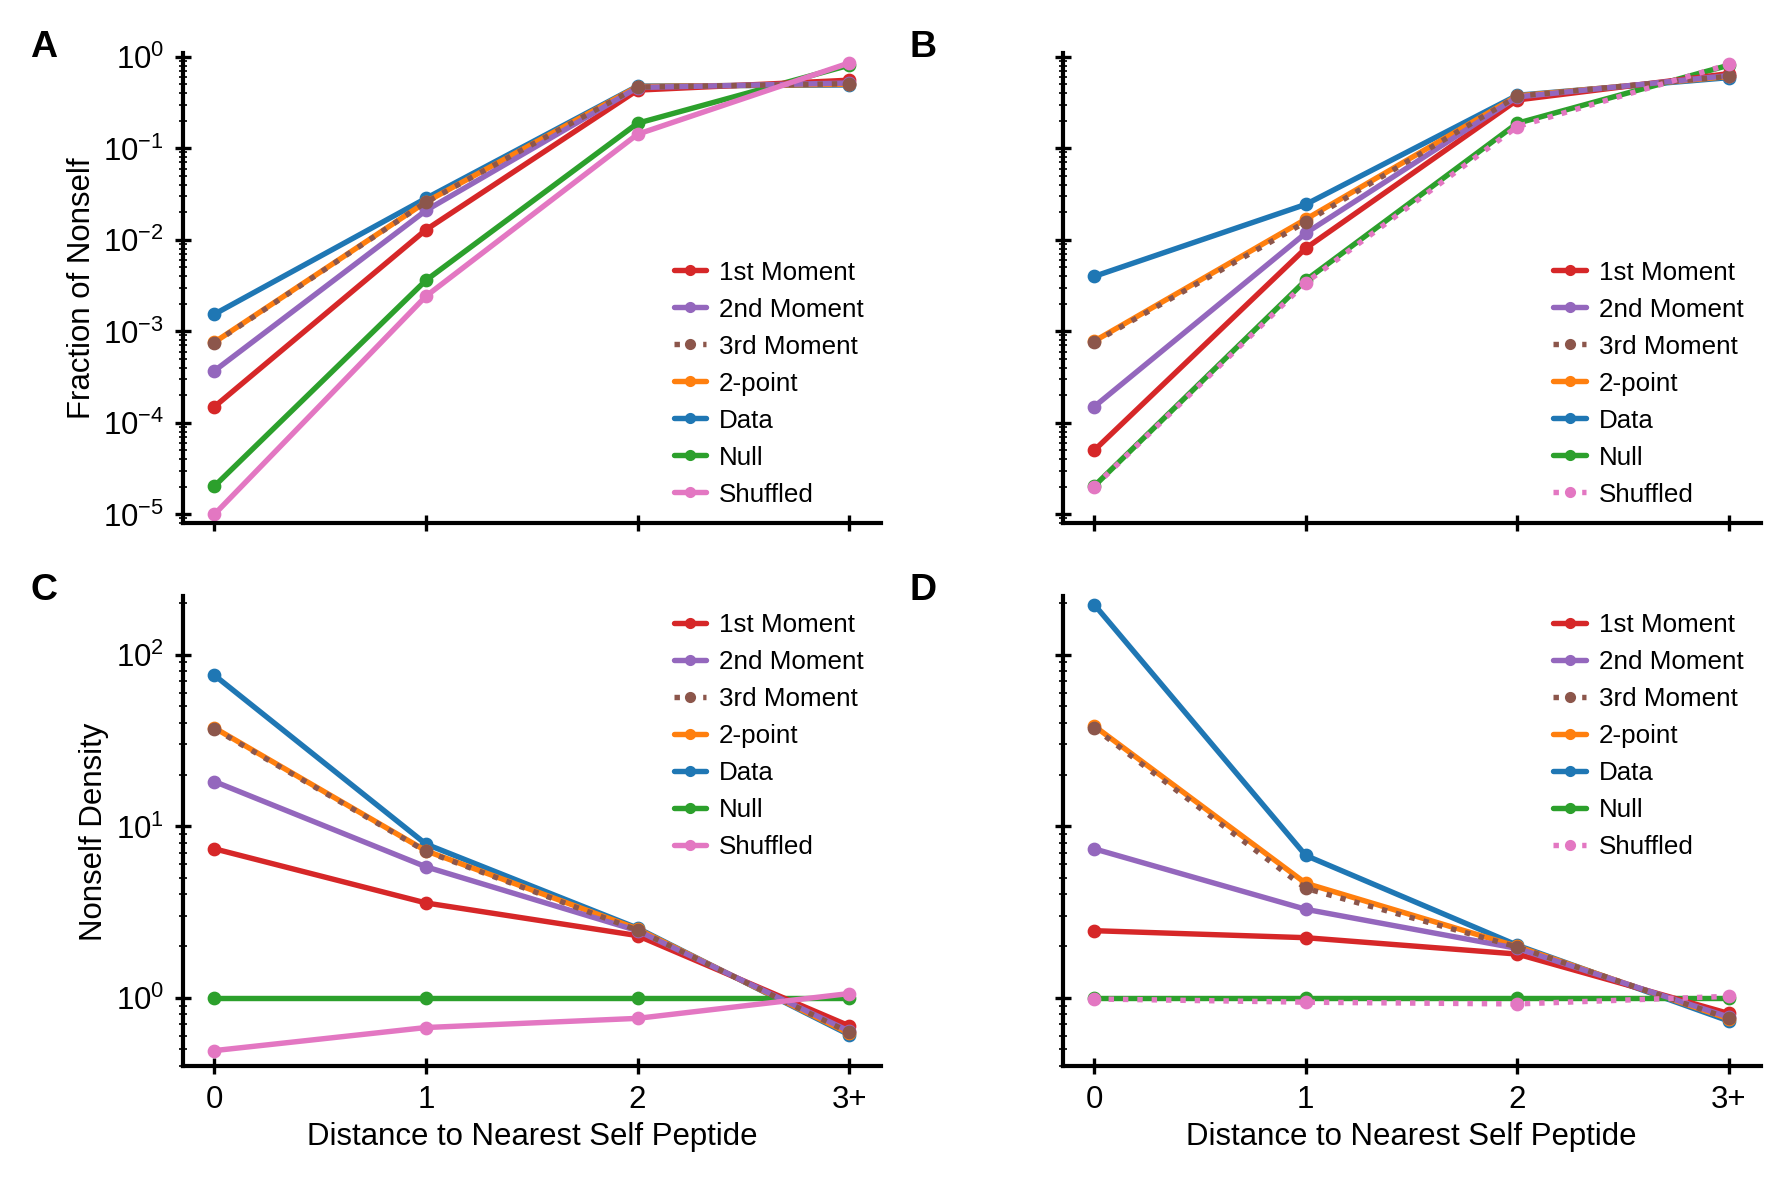

In [84]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_independent': '1st Moment',
    'Humanviruses_nskewfcov': '2-point',
    'Humanviruses_ncov': '2nd Moment',
    'Humanviruses_nskew': '3rd Moment',
    'Humanviruses_train': 'Data',
    'Malaria_independent': '1st Moment',
    'Malaria_ncov': '2nd Moment',
    'Malaria_nskew': '3rd Moment',
    'Malaria_nskewfcov': '2-point',
    'Malaria_train': 'Data',
#     'Malaria_test': 'Malaria Train Data',
#     'Mouse_train': 'Mouse Data',
    'uniform': 'Null',
    'malaria_shuffled_independent': 'Shuffled',
    'malaria_shuffled_independent2': 'Shuffled',

    'virus_shuffled_independent': 'Shuffled'
}



# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_train','Humanviruses_nskewfcov','uniform',
              'Humanviruses_independent', 'Humanviruses_ncov', 'Humanviruses_nskew','virus_shuffled_independent']:
    ps = ps_dict[model].astype(np.float64)
#     style = '-o' if ('uniform' not in model and 'shuffle' not in model) else '--o'
    if model in ['Humanviruses_nskew']:
        linestyle = 'dotted'
    else:
        linestyle = 'solid'
    axes[0,0].plot(range(4), ps,linestyle=linestyle,marker='o',label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, linestyle=linestyle,marker='o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_train','Malaria_nskewfcov',  'uniform',
              'Malaria_independent', 'Malaria_ncov', 'Malaria_nskew','malaria_shuffled_independent2']:
    ps = ps_dict[model].astype(np.float64)
    if model in ['Malaria_nskew','malaria_shuffled_independent2']:
        linestyle = 'dotted'
    else:
        linestyle = 'solid'    
    axes[0,1].plot(range(4), ps, linestyle=linestyle,marker='o',label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, linestyle=linestyle,marker='o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
    handles, labels = ax.get_legend_handles_labels()
    new_order = [3, 4, 5,1,0,2,6]
    handles = [handles[i] for i in new_order]
    labels = [labels[i] for i in new_order]
    ax.legend(handles, labels)
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()
plt.savefig('../fig3_other_models_not_annotated.png')
plt.savefig('../fig3_other_models_not_annotated.svg')